In [1]:
import os
print("Dataset Path: ")
for dirname, _, filenames in os.walk('C:/Users/cadva/OneDrive/Documents/fake-news/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset Path: 
C:/Users/cadva/OneDrive/Documents/fake-news/input\submit.csv
C:/Users/cadva/OneDrive/Documents/fake-news/input\test.csv
C:/Users/cadva/OneDrive/Documents/fake-news/input\train.csv


<div class = "alert alert-info">
    <h1>Importing Dependencies</h1>
</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# tf.__version__


import warnings 
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

<div class = "alert alert-warning">
    <h2>Dataset</h2>
</div>

In [3]:
train = pd.read_csv("/kaggle/input/fake-news/train.csv")
test = pd.read_csv("/kaggle/input/fake-news/test.csv")

In [4]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df = train.dropna()

In [6]:
X = df.drop("label", axis = 1)
X.shape

(18285, 4)

In [7]:
y = df["label"]
y.shape

(18285,)

In [8]:
messages=X.copy()
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [9]:
messages.reset_index(inplace=True)

<div class = "alert alert-danger">
    <h2>Data PreProcessing</h2>
</div>

In [10]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
voc = 10000
onehot_repr=[one_hot(words,voc)for words in corpus] 

In [12]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 9132 4634 2992]
 [   0    0    0 ... 5319 1513 4679]
 [   0    0    0 ... 4380 4948 5705]
 ...
 [   0    0    0 ... 3753 7663 6426]
 [   0    0    0 ...  465 6343 6078]
 [   0    0    0 ... 3571 2671 7730]]


In [13]:
len(embedded_docs),y.shape


(18285, (18285,))

In [14]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_final.shape,y_final.shape

((18285, 20), (18285,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [16]:
y_train

array([1, 1, 0, ..., 0, 0, 1])

<div class = "alert alert-success">
    <h1>RNN Model</h1>
</div>

In [17]:
# RNN Model

embedding_vector_features=40

rnn = Sequential()
rnn.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
rnn.add(SimpleRNN(100,return_sequences=False))

rnn.add(Dense(1, activation='sigmoid'))

rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               14100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 414,201
Trainable params: 414,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = rnn.fit(X_train, y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
383/383 [==============================] - 31s 65ms/step - loss: 0.2649 - accuracy: 0.8842 - val_loss: 0.1815 - val_accuracy: 0.9218
Epoch 2/20
383/383 [==============================] - 13s 34ms/step - loss: 0.0803 - accuracy: 0.9713 - val_loss: 0.2291 - val_accuracy: 0.9162
Epoch 3/20
383/383 [==============================] - 11s 28ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 0.3012 - val_accuracy: 0.9173
Epoch 4/20
383/383 [==============================] - 14s 37ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.3557 - val_accuracy: 0.9142
Epoch 5/20
383/383 [==============================] - 12s 31ms/step - loss: 3.7120e-04 - accuracy: 1.0000 - val_loss: 0.3717 - val_accuracy: 0.9135
Epoch 6/20
383/383 [==============================] - 10s 27ms/step - loss: 1.5847e-04 - accuracy: 1.0000 - val_loss: 0.4048 - val_accuracy: 0.9163
Epoch 7/20
383/383 [==============================] - 10s 26ms/step - loss: 9.8753e-05 - accuracy: 1.0000 - val_loss: 0.4154 - v

<div class = "alert alert-info">
    <h3>Line Plot: Overfitting</h3>
</div>

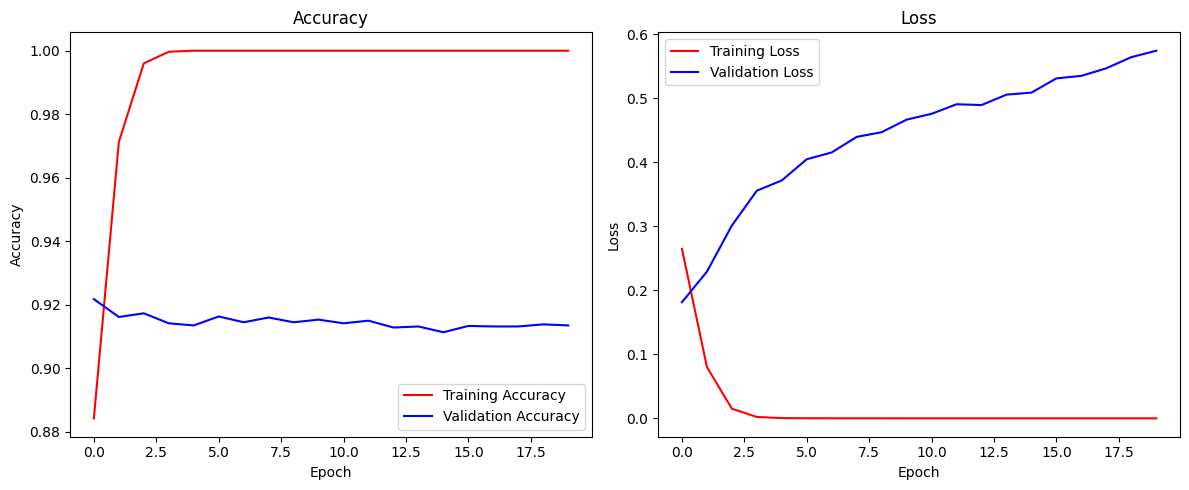

In [28]:
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)  
plt.plot(history.history["accuracy"], label="Training Accuracy", c="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="blue")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#  Loss
plt.subplot(1, 2, 2)  
plt.plot(history.history["loss"], label="Training Loss", c="red")
plt.plot(history.history["val_loss"], label="Validation Loss", c="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()  
plt.show()


<div class= "alert alert-warning">
    <h3>Evaluation & Performance</h3>
</div>

In [29]:
y_rnn=rnn.predict(X_test)
y_rnn = (y_rnn>0.5).astype(int)

189/189 [==============================] - 1s 3ms/step


In [30]:
accuracy_score(y_test,y_rnn)

0.9135045567522784

In [31]:
confusion_matrix(y_test,y_rnn)

array([[3086,  333],
       [ 189, 2427]])

In [32]:
print(classification_report(y_test,y_rnn))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3419
           1       0.88      0.93      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.92      0.91      6035
weighted avg       0.92      0.91      0.91      6035



<div class = "alert alert-danger">
    <h1>LSTM Model</h1>
</div>

In [33]:
## LSTM Model

embedding_vector_features=40
lstm=Sequential()
lstm.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
lstm.add(Dropout(0.3))
lstm.add(LSTM(100))
lstm.add(Dropout(0.3))
lstm.add(Dense(1,activation='sigmoid'))
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            400000    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________


In [34]:
### Finally Training
history = lstm.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
383/383 [==============================] - 16s 34ms/step - loss: 0.2831 - accuracy: 0.8694 - val_loss: 0.1923 - val_accuracy: 0.9215
Epoch 2/20
383/383 [==============================] - 4s 11ms/step - loss: 0.1307 - accuracy: 0.9510 - val_loss: 0.1886 - val_accuracy: 0.9215
Epoch 3/20
383/383 [==============================] - 4s 10ms/step - loss: 0.0792 - accuracy: 0.9716 - val_loss: 0.2329 - val_accuracy: 0.9198
Epoch 4/20
383/383 [==============================] - 4s 9ms/step - loss: 0.0511 - accuracy: 0.9829 - val_loss: 0.2726 - val_accuracy: 0.9193
Epoch 5/20
383/383 [==============================] - 3s 8ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.3044 - val_accuracy: 0.9115
Epoch 6/20
383/383 [==============================] - 3s 8ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.3857 - val_accuracy: 0.9065
Epoch 7/20
383/383 [==============================] - 3s 8ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.3612 - val_accuracy: 0.9067
Ep

<div class = "alert alert-info">
    <h3>Line Plot: Overfitting</h3>
</div>

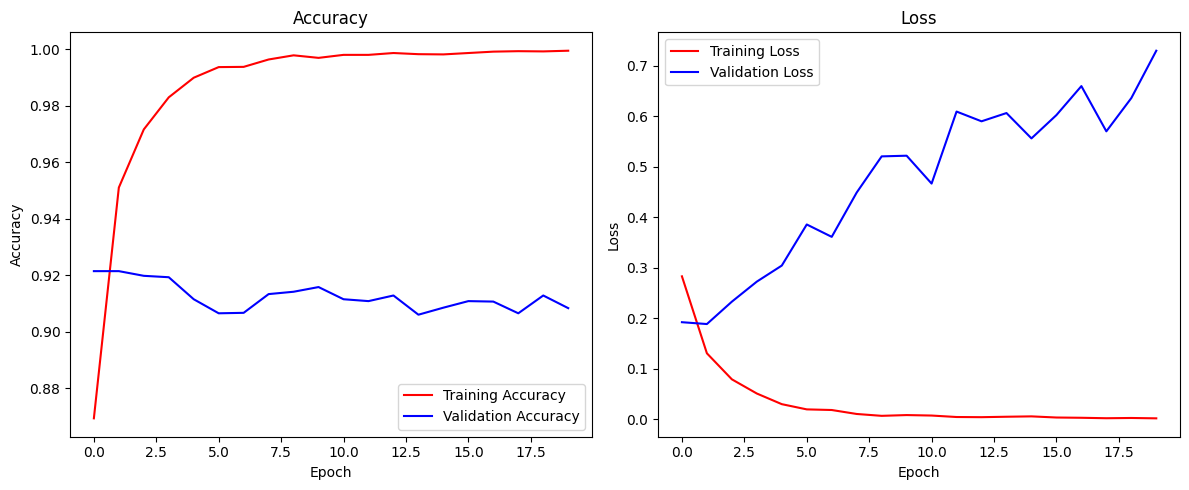

In [35]:
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)  
plt.plot(history.history["accuracy"], label="Training Accuracy", c="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="blue")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#  Loss
plt.subplot(1, 2, 2)  
plt.plot(history.history["loss"], label="Training Loss", c="red")
plt.plot(history.history["val_loss"], label="Validation Loss", c="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()  
plt.show()


<div class= "alert alert-warning">
    <h3>Evaluation & Performance</h3>
</div>

In [36]:
y_lstm=lstm.predict(X_test)
y_lstm = (y_lstm>0.5).astype(int)

189/189 [==============================] - 1s 2ms/step


In [37]:
accuracy_score(y_test,y_lstm)

0.9083678541839271

In [38]:
confusion_matrix(y_test,y_lstm)

array([[3136,  283],
       [ 270, 2346]])

In [39]:
print(classification_report(y_test,y_lstm))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3419
           1       0.89      0.90      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



<div class = "alert alert-success">
    <h1>Bidirectional Model</h1>
</div>

In [40]:
#Bidirectional Model

embedding_vector_features=40
bid=Sequential()
bid.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
bid.add(Bidirectional(LSTM(100)))
bid.add(Dropout(0.3))
bid.add(Dense(1,activation='sigmoid'))
bid.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bid.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = bid.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
383/383 [==============================] - 18s 36ms/step - loss: 0.2620 - accuracy: 0.8827 - val_loss: 0.2138 - val_accuracy: 0.9196
Epoch 2/20
383/383 [==============================] - 4s 12ms/step - loss: 0.1197 - accuracy: 0.9549 - val_loss: 0.2340 - val_accuracy: 0.9067
Epoch 3/20
383/383 [==============================] - 5s 13ms/step - loss: 0.0689 - accuracy: 0.9747 - val_loss: 0.2824 - val_accuracy: 0.9132
Epoch 4/20
383/383 [==============================] - 4s 11ms/step - loss: 0.0377 - accuracy: 0.9869 - val_loss: 0.3699 - val_accuracy: 0.8983
Epoch 5/20
383/383 [==============================] - 3s 9ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.4197 - val_accuracy: 0.9082
Epoch 6/20
383/383 [==============================] - 4s 10ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.4626 - val_accuracy: 0.9021
Epoch 7/20
383/383 [==============================] - 4s 10ms/step - loss: 0.0105 - accuracy: 0.9976 - val_loss: 0.6127 - val_accuracy: 0.9039

<div class = "alert alert-info">
    <h3>Line Plot: Overfitting</h3>
</div>

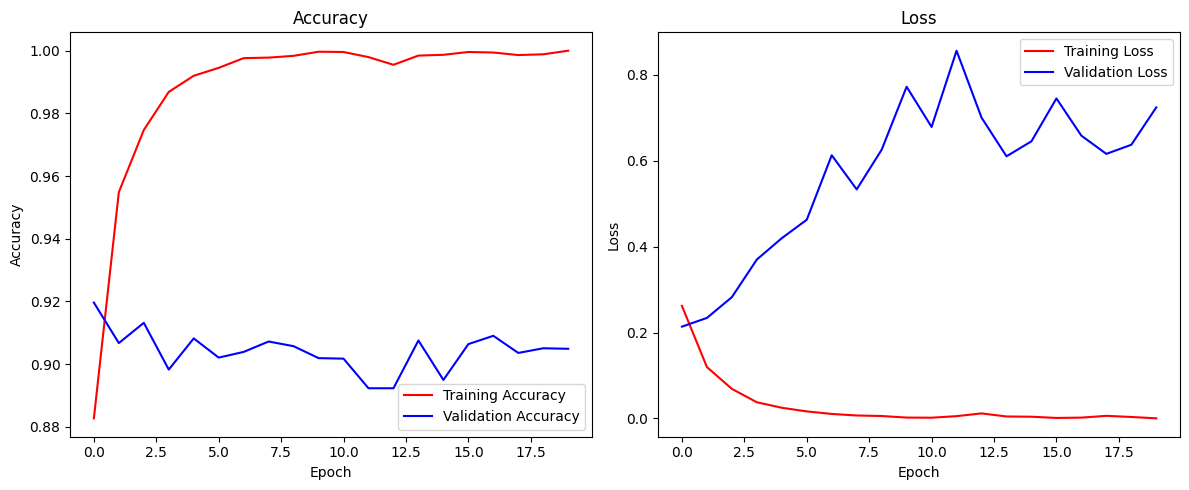

In [42]:
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)  
plt.plot(history.history["accuracy"], label="Training Accuracy", c="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="blue")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#  Loss
plt.subplot(1, 2, 2)  
plt.plot(history.history["loss"], label="Training Loss", c="red")
plt.plot(history.history["val_loss"], label="Validation Loss", c="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()  
plt.show()


<div class= "alert alert-warning">
    <h3>Evaluation & Performance</h3>
</div>

In [43]:
y_bid=bid.predict(X_test)
y_bid = (y_bid>0.5).astype(int)

189/189 [==============================] - 1s 3ms/step


In [44]:
accuracy_score(y_test,y_bid)

0.9048881524440763

In [45]:
confusion_matrix(y_test,y_bid)

array([[3118,  301],
       [ 273, 2343]])

In [46]:
print(classification_report(y_test,y_bid))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.89      0.90      0.89      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.91      0.90      0.90      6035

